In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Creating path
path = r'C:\Users\tomas\09-04-2024 World Happiness'

In [4]:
# Importing data set from pickle format
df = pd.read_pickle(os.path.join(path, '01 Data', 'Prepared Data', 'merged_.pkl'))

# Data cleaning

In [5]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [6]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015-01-01
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015-01-01
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015-01-01
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015-01-01
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015-01-01


In [7]:
df.shape

(782, 10)

In [8]:
# Checking for missing values
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

In [9]:
# Calculate the average of non-NaN values in the column
avg = df['Trust (Government Corruption)'].mean()
# Replace NaN values with the average
df['Trust (Government Corruption)'].fillna(avg, inplace=True)

In [10]:
# Checking for missing values
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [11]:
# checking for duplicate values
df.duplicated().sum()

0

In [12]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2016-12-29 06:19:20.102301696
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,2016-01-01 00:00:00
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,2017-01-01 00:00:00
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832,2018-01-01 00:00:00
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019-01-01 00:00:00
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105749,0.122321,NaN


# Step 4

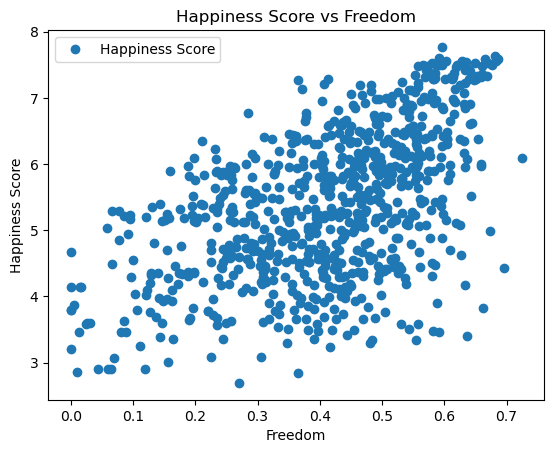

In [13]:
# Create a scatterplot 
df.plot(x = 'Freedom', y='Happiness Score',style='o') 
plt.title('Happiness Score vs Freedom')  
plt.xlabel('Freedom')  
plt.ylabel('Happiness Score')  
plt.show()

# Step 5

### Is there a relationship between trust in government and happiness score?

# Step 6

In [14]:
# Reshape the variables into NumPy and put them into separate objects.
X = df['Freedom'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [15]:
X

array([[0.66557   ],
       [0.62877   ],
       [0.64938   ],
       [0.66973   ],
       [0.63297   ],
       [0.64169   ],
       [0.61576   ],
       [0.6598    ],
       [0.63938   ],
       [0.65124   ],
       [0.41319   ],
       [0.63376   ],
       [0.62433   ],
       [0.48181   ],
       [0.54604   ],
       [0.49049   ],
       [0.61583   ],
       [0.61777   ],
       [0.5845    ],
       [0.64157   ],
       [0.59625   ],
       [0.63274   ],
       [0.42908   ],
       [0.54252   ],
       [0.5421    ],
       [0.61477   ],
       [0.44132   ],
       [0.6404    ],
       [0.55011   ],
       [0.44974   ],
       [0.46364   ],
       [0.60362   ],
       [0.53466   ],
       [0.55664   ],
       [0.31048   ],
       [0.45951   ],
       [0.60365   ],
       [0.3974    ],
       [0.55499   ],
       [0.59657   ],
       [0.55884   ],
       [0.4035    ],
       [0.57733   ],
       [0.65821   ],
       [0.31751   ],
       [0.49615   ],
       [0.33208   ],
       [0.485

In [16]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

# Step 7

In [17]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 8

In [18]:
# Create a regression object.
regression = LinearRegression()

In [19]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

# Step 9

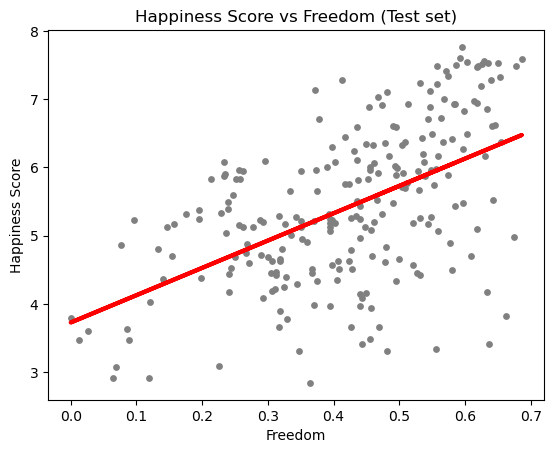

In [26]:
# Create a plot that shows the regression
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Freedom (Test set)')
plot_test.xlabel('Freedom')
plot_test.ylabel('Happiness Score')
plot_test.show()

# Step 10

### As the happiness score grows, the freedom levels is slithly growing too. That demonstrates that freedom has a minor impact on the happiness score.

# Step 11

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.00888106]]
Mean squared error:  0.9166426188158068
R2 score:  0.30249667614916287


# Step 12

In [24]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.592213
1,6.886,5.918002
2,6.344,5.528141
3,7.119,5.914153
4,3.781,5.043184
5,4.692,4.724649
6,4.390,5.036048
7,5.061,5.968273
8,6.929,5.783865
9,5.488,4.683547


In [27]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.00888106]]
Mean squared error:  0.8697604041988707
R2 score:  0.3033840296514728


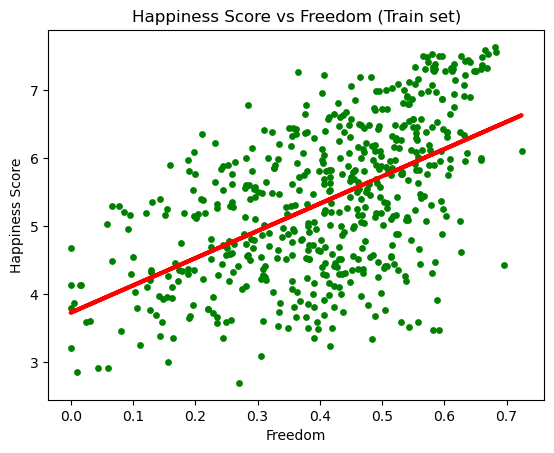

In [30]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness Score vs Freedom (Train set)')
plot_test.xlabel('Freedom')
plot_test.ylabel('Happiness Score')
plot_test.show()

# Step 13

#### The test model performed well when compared to the actual data, indicating a difference in happiness score and freedom.